             woh        age
count  72.000000  72.000000
mean    0.855278  36.001389
std     0.121458  20.930438
min     0.460000   0.500000
25%     0.800000  18.250000
50%     0.870000  36.000000
75%     0.942500  53.750000
max     1.040000  71.500000
0     0.46
1     0.47
2     0.56
3     0.61
4     0.61
      ... 
67    0.99
68    0.97
69    1.01
70    0.99
71    1.04
Name: woh, Length: 72, dtype: float64


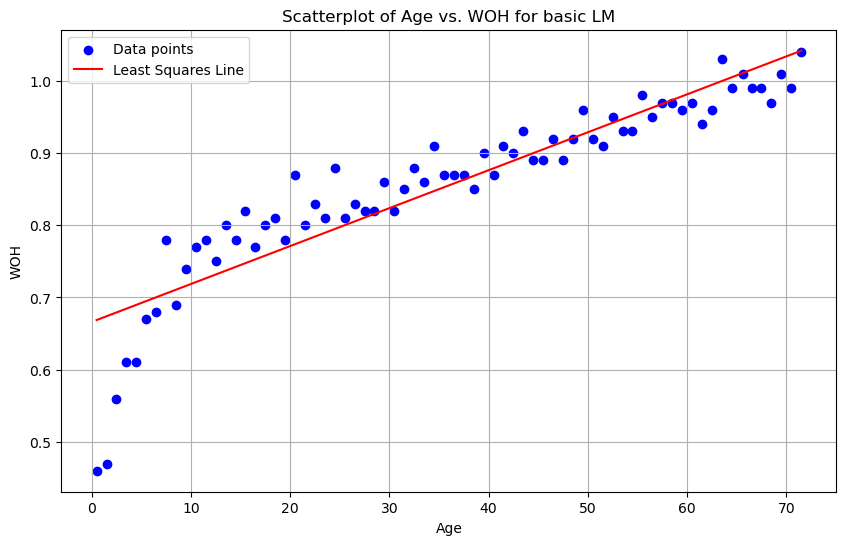

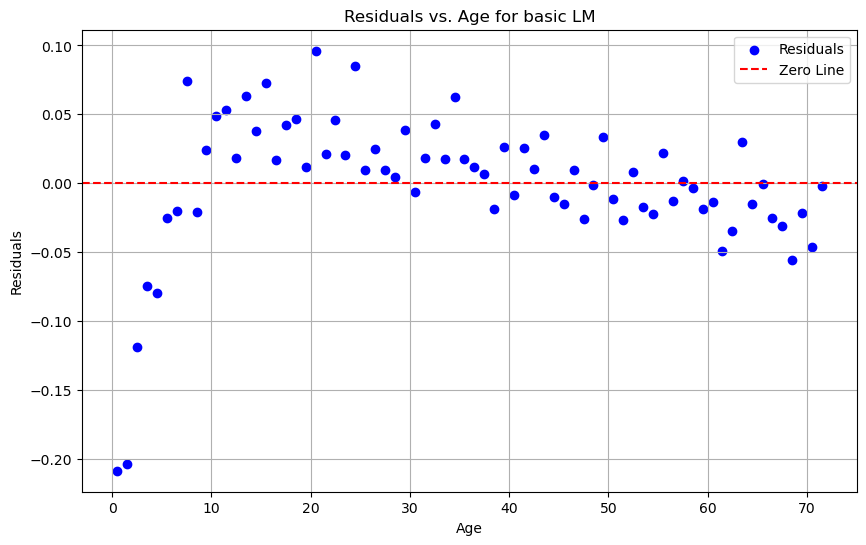

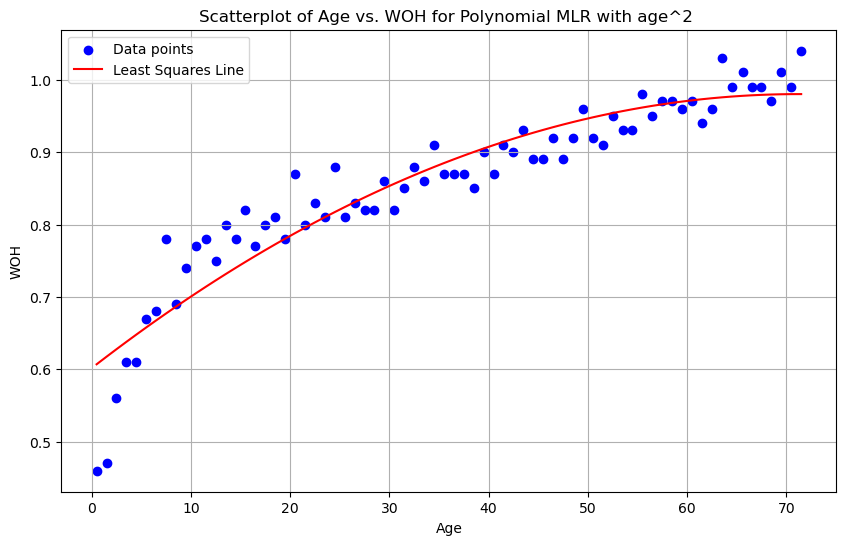

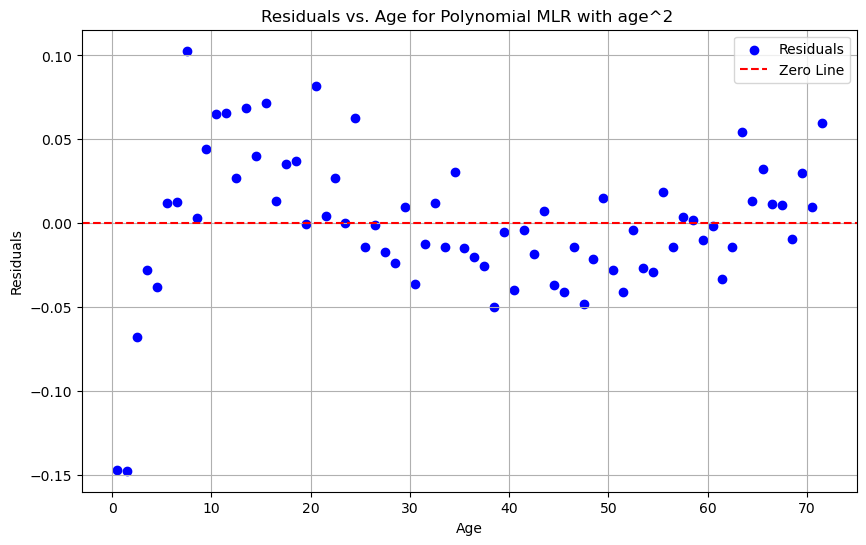

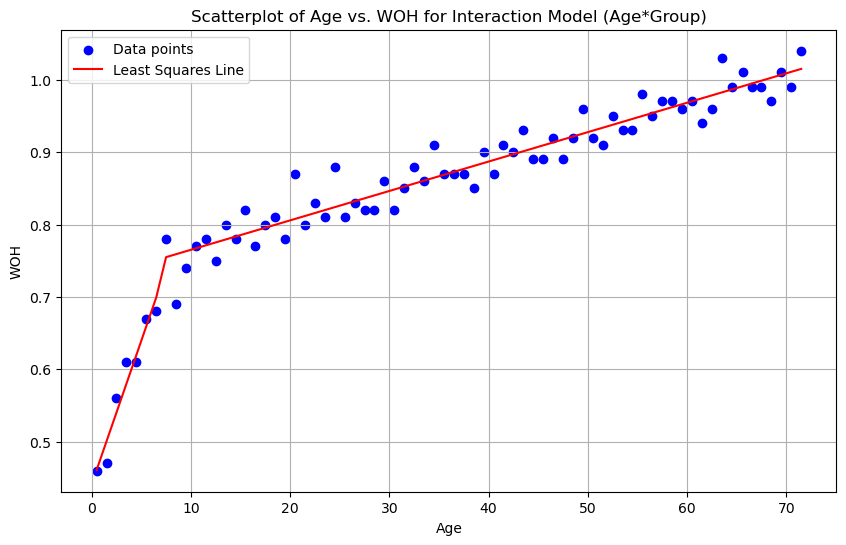

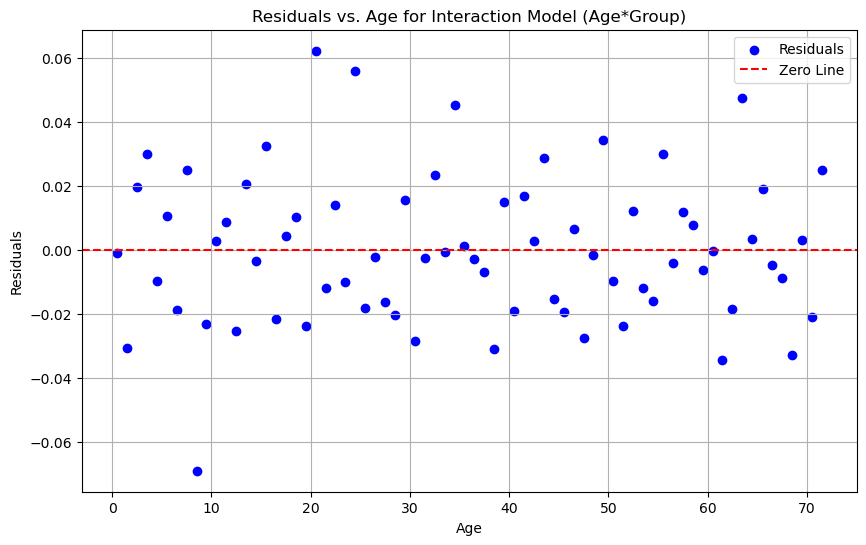

In [1]:
# Problem 2 Code
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def plot_regression_and_residuals(nutrition, model, model_name, X_with_intercept, y, x_label='Age', y_label='WOH'):
    # Plot WOH vs Age with the regression line
    plt.figure(figsize=(10, 6))
    plt.scatter(nutrition['age'], nutrition['woh'], color='blue', label='Data points')
    plt.plot(nutrition['age'], model.predict(X_with_intercept), color='red', label='Least Squares Line')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f'Scatterplot of {x_label} vs. {y_label} for {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate residuals
    residuals = y - model.predict(X_with_intercept)

    # Plot residuals vs Age
    plt.figure(figsize=(10, 6))
    plt.scatter(nutrition['age'], residuals, color='blue', label='Residuals')
    plt.axhline(y=0, color='red', linestyle='--', label='Zero Line')
    plt.xlabel(x_label)
    plt.ylabel('Residuals')
    plt.title(f'Residuals vs. {x_label} for {model_name}')
    plt.legend()
    plt.grid(True)
    plt.show()

nutrition = pd.read_csv('nutrition.csv')

# Display summary statistics
summary = nutrition.describe()
print(summary)

# Fit the SLR model using LinearRegression
X = nutrition['age'] # Predictor variable
y = nutrition['woh']  # Response variable
print(y)

# Add a constant to the predictor variable (intercept term)
X_with_intercept = sm.add_constant(X)
X_with_intercept.rename(columns={'const': 'WOH_intercept'}, inplace=True)
# Create and fit the model
model = sm.OLS(y, X_with_intercept).fit()

# Plot WOH vs Age
plot_regression_and_residuals(nutrition, model, "basic LM", X_with_intercept, y)
## The model fits the data reasonably well, as many of the data points are close to the regression line. However, there are noticeable elements that suggest the model could be improved. Specifically, there seems to be a "log-like shape" in the data, where WOH starts to plateau with age. This indicates that the linear model overestimates WOH for both the youngest and oldest ages, while underestimating it for the middle-range ages.
## The residuals plot indicates that the residuals are not randomly scattered around zero but instead show a clear dependence on age. This suggests that the residuals are not normally distributed around zero, which is a strong indication that the model is not an ideal fit for the data. Specifically, the residuals show a noticeable pattern, particularly for younger ages, where the model consistently underpredicts.

# Create the new variable age^2
nutrition['age2'] = nutrition['age'] ** 2

# Define the new predictor variables including age and age^2
X_new = nutrition[['age', 'age2']]

# Add a constant to the predictor variables (intercept term)
X_new_with_intercept = sm.add_constant(X_new)

# Create and fit the MLR model using OLS
model_new = sm.OLS(y, X_new_with_intercept).fit()
plot_regression_and_residuals(nutrition, model_new, "Polynomial MLR with age^2 ", X_new_with_intercept, y)

## At first glance, the polynomial model with age² fits the data better, as it follows the pattern more closely and provides a more accurate prediction for WOH across the full range of ages. However, the dispersion of the data points from the regression line (residuals) is still significant.
## In the residuals plot, we can see that most residuals still range between -0.05 and 0.05, which is not ideal. Nevertheless, we have eliminated the larger residuals present in the original model, particularly at the lower ages. While a pattern can still be observed, it is now much more subtle, and the residuals appear more random than before.

# Using interaction terms (GROUP)
# nutrition is already sorted by age
nutrition['group'] = [1 if i < 7 else 0 for i in range(len(nutrition))] # group starts at 0

# Create interaction terms
nutrition['age_group'] = nutrition['age'] * nutrition['group']

# Define the new predictor variables including age, group, and the interaction term
X_with_interaction = nutrition[['age', 'group', 'age_group']]

# Add a constant to the predictor variables (intercept term)
X_interaction_with_intercept = sm.add_constant(X_with_interaction)

# Create and fit the interaction model using OLS
model_interaction = sm.OLS(y, X_interaction_with_intercept).fit()

# Call the function to plot the regression and residuals for the interaction model
plot_regression_and_residuals(nutrition, model_interaction, "Interaction Model (Age*Group)", X_interaction_with_intercept, y)